### Importing libraries

In [23]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt   

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical

### Loading the dataset

In [24]:
wine_data = datasets.load_wine()

In [25]:
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### To dataframe

In [26]:
data = pd.DataFrame(data = wine_data['data'], columns = wine_data['feature_names'])

data['target'] = wine_data['target']

data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0,2
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
75,11.66,1.88,1.92,16.0,97.0,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428.0,1
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0,0


In [27]:
data.shape

(178, 14)

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [29]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [30]:
data['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### Visualisation

c:\Users\mchettih\AppData\Local\anaconda3\envs\Pluralsight_Getting_Started_with_Tensorflow_2.0_Env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

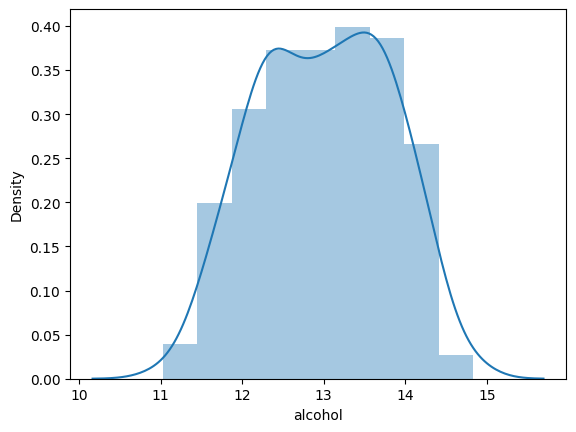

In [31]:
sns.distplot(data['alcohol'],kde=1)

Alcohol content in each class 

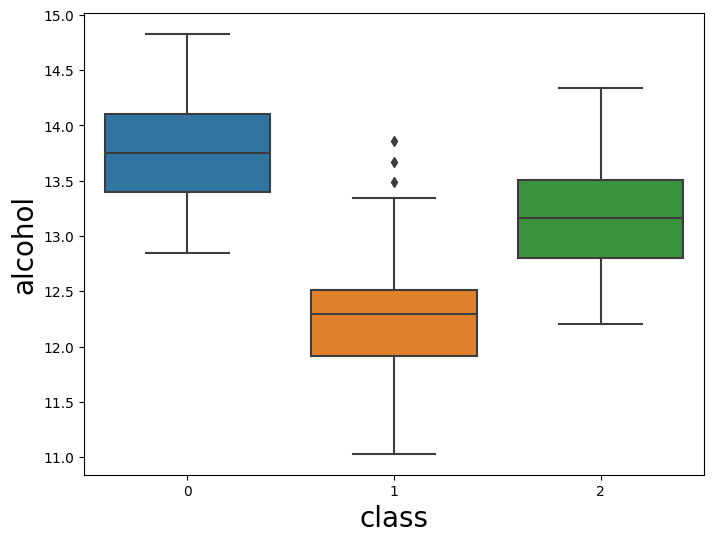

In [32]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='target', y='alcohol', data = data)

plt.xlabel('class', fontsize = 20)
plt.ylabel('alcohol', fontsize = 20)

plt.show()

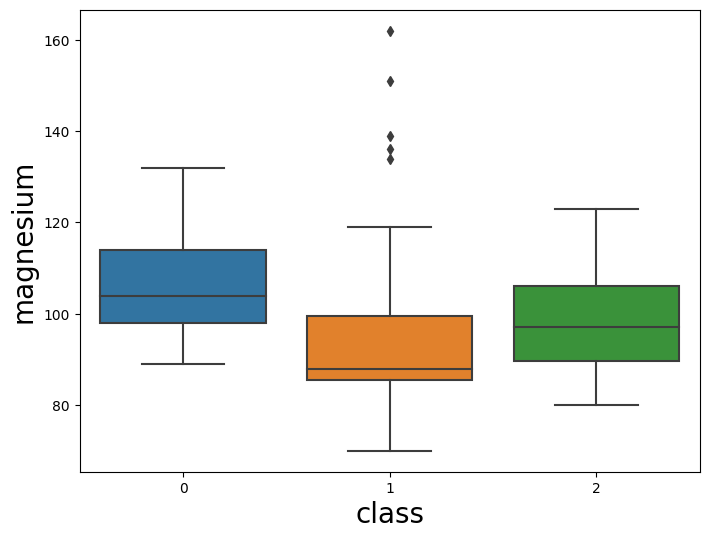

In [33]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='target', y='magnesium', data = data)

plt.xlabel('class', fontsize = 20)
plt.ylabel('magnesium', fontsize = 20)

plt.show()

### Splitting the data

In [34]:
features = data.drop('target', axis=1)

target = data[['target']]

In [35]:
features.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [36]:
target.sample(5)

,target
103,1
43,0
158,2
108,1
152,2


In [37]:
target = to_categorical(target, 3)

target

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [38]:
standardScaler = StandardScaler()

processed_features = pd.DataFrame(standardScaler.fit_transform(features), 
                                columns=features.columns,
                                index=features.index)

processed_features.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.943708e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,3.592632e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.066660e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.983626e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-7.983626e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-3.991813e-17,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.979533e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-5.588538e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.656602e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-3.442939e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


### Splitting dataset

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state=1)

In [40]:
x_train.shape, y_train.shape

((142, 13), (142, 3))

In [41]:
x_test.shape, y_test.shape

((36, 13), (36, 3))

### Building the model

In [42]:
class WineClassificationModel(Model):
    
    def __init__(self, input_shape):
        
        super(WineClassificationModel, self).__init__()

        self.d1 = layers.Dense(128, activation = 'relu', input_shape = [input_shape])
        self.d2 = layers.Dense(64, activation = 'relu')
        
        self.d3 = layers.Dense(3, activation = 'softmax')

    def call(self, x):
        
        x = self.d1(x)
        x = self.d2(x)

        x = self.d3(x)
        
        return x

In [43]:
model = WineClassificationModel(x_train.shape[1])

model.compile(optimizer = keras.optimizers.SGD(lr = 0.001),
             loss = tf.keras.losses.CategoricalCrossentropy(),
             metrics = ['accuracy'])

In [44]:
num_epochs = 100

In [45]:
training_history = model.fit(x_train.values, 
                             y_train, 
                             validation_split = 0.2, 
                             epochs = num_epochs,
                             batch_size = 48)

Epoch 1/100


3/3 [==============================] - 0s 69ms/step - loss: 1.0515 - accuracy: 0.3805 - val_loss: 1.0874 - val_accuracy: 0.3793
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9942 - accuracy: 0.6018 - val_loss: 1.0356 - val_accuracy: 0.4828
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9356 - accuracy: 0.7168 - val_loss: 0.9897 - val_accuracy: 0.6207
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 0.8834 - accuracy: 0.7876 - val_loss: 0.9463 - val_accuracy: 0.6207
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 0.8366 - accuracy: 0.8407 - val_loss: 0.9089 - val_accuracy: 0.6552
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.7934 - accuracy: 0.8761 - val_loss: 0.8699 - val_accuracy: 0.6552
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 0.7534 - accuracy: 0.9027 - val_loss: 0.8390 - val_accuracy: 0.7241
Epoch 8/100
3/3 [=====================

In [46]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

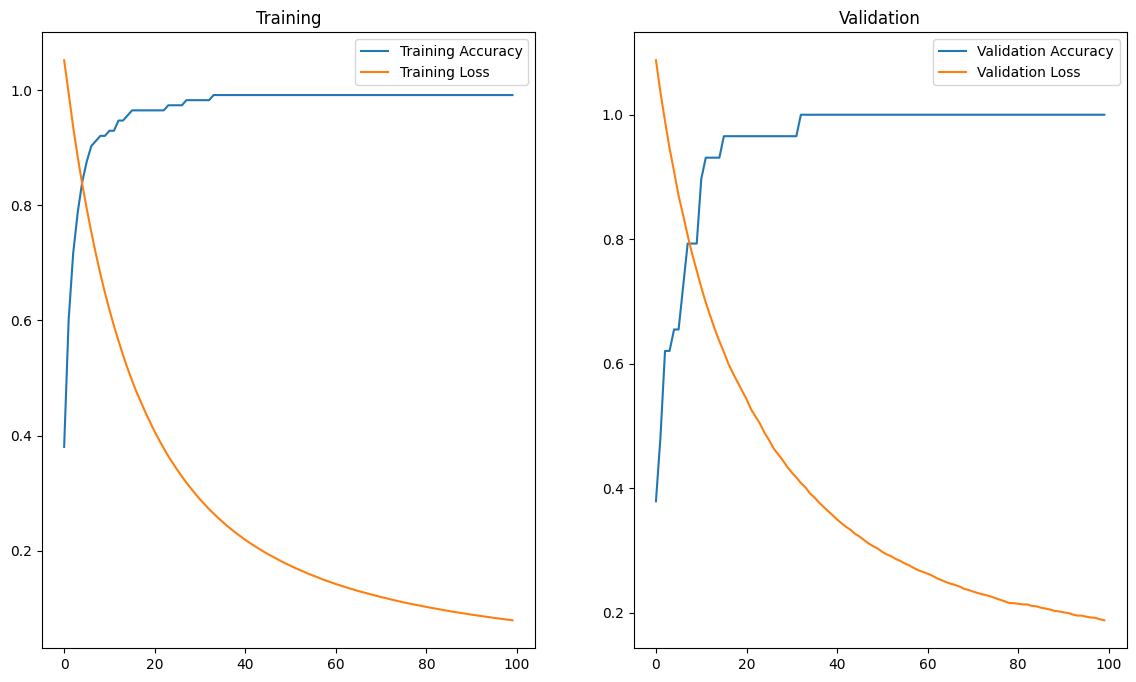

In [47]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['val_accuracy']
recall = training_history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Training')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Validation Accuracy')
plt.plot(epochs_range, recall, label='Validation Loss')

plt.title('Validation')
plt.legend()

### Model evaluation

In [48]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)

score_df

2/2 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.9722


loss        0.122380
accuracy    0.972222
dtype: float64

### Predicting the model

In [49]:
y_pred = model.predict(x_test)

y_pred[:10]

2/2 [==============================] - 0s 1ms/step


array([[5.97765110e-02, 7.67238960e-02, 8.63499522e-01],
       [2.33521983e-02, 9.66833591e-01, 9.81422327e-03],
       [9.68370259e-01, 2.00463440e-02, 1.15833925e-02],
       [1.13537490e-01, 8.77501011e-01, 8.96151084e-03],
       [9.81276155e-01, 6.13425672e-03, 1.25895534e-02],
       [2.17309352e-02, 6.92691356e-02, 9.08999979e-01],
       [3.06243785e-02, 9.44671810e-01, 2.47037858e-02],
       [9.98941123e-01, 5.43923175e-04, 5.14919637e-04],
       [2.18413733e-02, 2.79729832e-02, 9.50185716e-01],
       [1.93269756e-02, 9.38560843e-01, 4.21122648e-02]], dtype=float32)

In [50]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)

y_pred = np.where(y_pred<0.5, 0, y_pred)

In [51]:
y_pred[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [52]:
y_test[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

Score

In [53]:
accuracy_score(y_test, y_pred)

0.9444444444444444